# Arvores de Decisão - Avaliação de Carros

In [ ]:
### Disponível em https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

5. Number of Instances: 958 (legal tic-tac-toe endgame boards)

6. Number of Attributes: 9, each corresponding to one tic-tac-toe square

7. Attribute Information: (x=player x has taken, o=player o has taken, b=blank)

    1. top-left-square: {x,o,b}
    2. top-middle-square: {x,o,b}
    3. top-right-square: {x,o,b}
    4. middle-left-square: {x,o,b}
    5. middle-middle-square: {x,o,b}
    6. middle-right-square: {x,o,b}
    7. bottom-left-square: {x,o,b}
    8. bottom-middle-square: {x,o,b}
    9. bottom-right-square: {x,o,b}
   10. Class: {positive,negative}

In [116]:
import pandas as pd

In [117]:
df = pd.read_csv("car.data")
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class"]
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [118]:
df2.ix[0]

buying      3
maint       3
doors       0
persons     0
lug_boot    2
safety      2
Class       2
Name: 0, dtype: int64

In [119]:
print(list(le_buying.inverse_transform([3])))
print(list(le_maint.inverse_transform([3])))
print(list(le_doors.inverse_transform([0])))
print(list(le_persons.inverse_transform([0])))
print(list(le_lug_boot.inverse_transform([2])))
print(list(le_safety.inverse_transform([2])))
print(list(le_class.inverse_transform([2])))

['vhigh']
['vhigh']
['2']
['2']
['small']
['med']
['unacc']


In [120]:
len(df)

1727

In [121]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,Class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,more,big,high,unacc
freq,432,432,432,576,576,576,1209


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
buying      1727 non-null object
maint       1727 non-null object
doors       1727 non-null object
persons     1727 non-null object
lug_boot    1727 non-null object
safety      1727 non-null object
Class       1727 non-null object
dtypes: object(7)
memory usage: 94.5+ KB


### limpeza dos dados missing

In [123]:
df2 = df.dropna()
len(df2)

1727

In [124]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [125]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [126]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

car_data = df2.loc[:,["buying", "maint", "doors", "persons", "lug_boot", "safety"]]
car_target = df2["Class"]

In [127]:
car_data[:3]

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low


In [128]:
car_target[:3]

0    unacc
1    unacc
2    unacc
Name: Class, dtype: object

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    car_data, car_target, stratify=car_target, random_state=42)

X_train[:3]

,buying,maint,doors,persons,lug_boot,safety
877,med,vhigh,2,4,med,high
1478,low,high,4,more,med,low
1401,low,vhigh,5more,more,big,med


## conversao de categorias para inteiros

In [ ]:
Class Values: 
unacc, acc, good, vgood (de Não-aceitável até Muito Bom)

Attributes: 
buying: vhigh, high, med, low. 
maint: vhigh, high, med, low. 
doors: 2, 3, 4, 5more. 
persons: 2, 4, more.   
lug_boot: small, med, big. 
safety: low, med, high.

In [131]:
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class"]

In [132]:
from sklearn.preprocessing import LabelEncoder

le_buying = LabelEncoder()
le_buying.fit(["vhigh", "high", "med", "low"])
print(le_buying.transform(["vhigh", "high", "med", "low"]))
print(list(le_buying.inverse_transform([3, 0, 2, 1])))

le_maint = LabelEncoder()
le_maint.fit(["vhigh", "high", "med", "low"])
print(le_maint.transform(["vhigh", "high", "med", "low"]))
print(list(le_maint.inverse_transform([3, 0, 2, 1])))

le_doors = LabelEncoder()
le_doors.fit(["2", "3", "4", "5more"])
print(le_doors.transform(["2", "3", "4", "5more"]))
print(list(le_doors.inverse_transform([3, 0, 2, 1])))

le_persons = LabelEncoder()
le_persons.fit(["2", "4", "more"])
print(le_persons.transform(["2", "4", "more"]))
print(list(le_persons.inverse_transform([0, 2, 1])))

le_lug_boot = LabelEncoder()
le_lug_boot.fit(["small", "med", "big"])
print(le_lug_boot.transform(["small", "med", "big"]))
print(list(le_lug_boot.inverse_transform([0, 2, 1])))

le_safety = LabelEncoder()
le_safety.fit(["low", "med", "high"])
print(le_safety.transform(["low", "med", "high"]))
print(list(le_safety.inverse_transform([0, 2, 1])))

le_class = LabelEncoder()
le_class.fit(["unacc", "acc", "good", "vgood"])
print(le_class.transform(["unacc", "acc", "good", "vgood"]))
print(list(le_class.inverse_transform([0, 2, 1, 3])))

[3 0 2 1]
['vhigh', 'high', 'med', 'low']
[3 0 2 1]
['vhigh', 'high', 'med', 'low']
[0 1 2 3]
['5more', '2', '4', '3']
[0 1 2]
['2', 'more', '4']
[2 1 0]
['big', 'small', 'med']
[1 2 0]
['high', 'med', 'low']
[2 0 1 3]
['acc', 'unacc', 'good', 'vgood']


In [133]:
# codifica todo o dataframe
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2 = df
for col in X_test.columns.values:
       # Encoding only categorical variables
       if X_test[col].dtypes=='object':
           # Using whole data to form an exhaustive list of levels
           data=X_train[col].append(X_test[col])
           le.fit(data.values)
           X_train[col]=le.transform(X_train[col])
           X_test[col]=le.transform(X_test[col])
#X_train

/Users/valencar/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/valencar/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### aplicar o algoritmo de arvores de decisao

In [134]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.991


### Previsao

In [135]:
import numpy as np

In [136]:
# [2 0 1 3]
#['acc', 'unacc', 'good', 'vgood']

carro = [
#buying maint doors  persons lug_boot safety 
    2,  1,     1   ,    2,    2,        1
]

carro1 = np.array(carro).reshape(1, -1) 

print(tree.predict(carro1))
#carro[0]
print(le_buying.inverse_transform(carro[0]))
#print ("buying: %s maint:%s doors:%s  persons:%s lug_boot:%s safety:%s".format(le_buying.inverse_transform)),

['unacc']
med


In [137]:
carro

[2, 1, 1, 2, 2, 1]

In [ ]:
Attributes: 
buying: vhigh, high, med, low. 
maint: vhigh, high, med, low. 
doors: 2, 3, 4, 5more. 
persons: 2, 4, more.   
lug_boot: small, med, big. 
safety: low, med, high.

In [138]:
import numpy as np

In [139]:
carro2 = []
#buying maint doors  persons lug_boot safety 
carro2.append(le_buying.transform(["high"]))
carro2.append(le_maint.transform(["med"]))
carro2.append(le_doors.transform(["4"]))
carro2.append(le_persons.transform(["4"]))
carro2.append(le_lug_boot.transform(["med"]))
carro2.append(le_safety.transform(["med"]))
#carro2
carro3 = np.array(carro2).reshape(1, -1) 
carro3
tree.predict(carro3)[0]

'acc'

In [ ]:
Atributos

buying: vhigh, high, med, low. 
maint: vhigh, high, med, low. 
doors: 2, 3, 4, 5more. 
persons: 2, 4, more.   
lug_boot: small, med, big. 
safety: low, med, high.

In [141]:
carros = [
#buying     maint   doors  persons  lug_boot     safety  
[  "med",  "med",   "2",    "4",      "big",     "high"],
[  "vhigh",  "med",   "3",    "more",  "med",     "med"]    
]

print("buying     maint   doors  persons  lug_boot     safety")
for carro in carros:
    carro2 = []
    carro2.append(le_buying.transform([carro[0]]))
    carro2.append(le_maint.transform([carro[1]]))
    carro2.append(le_doors.transform([carro[2]]))
    carro2.append(le_persons.transform([carro[3]]))
    carro2.append(le_lug_boot.transform([carro[4]]))
    carro2.append(le_safety.transform([carro[5]]))
    #print(carro2)
    carro3 = np.array(carro2).reshape(1, -1) 
    print(carro3)
    print(tree.predict(carro3)[0])

buying     maint   doors  persons  lug_boot     safety
[[2 2 0 1 0 0]]
vgood
[[3 2 1 2 1 2]]
acc


### Atributos mais importantes

Atributos mais relavantes


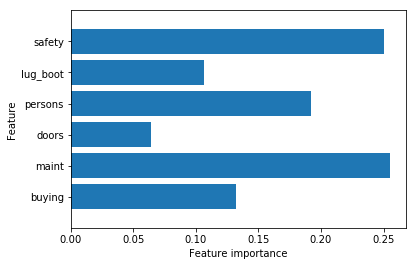

array([ 0.13192115,  0.25503203,  0.06395813,  0.19167667,  0.10664823,
        0.25076379])

In [144]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(model):
    columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
    n_features = len(columns)
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    

plot_feature_importances(tree)
tree.feature_importances_

### Analisando a árvore de decisao

In [145]:
# Class: "unacc", "acc", "good", "vgood"
Class = ["unacc", "acc", "good", "vgood"]
features = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["unacc", "acc", "good", "vgood",],
                feature_names=features, impurity=False, filled=True)

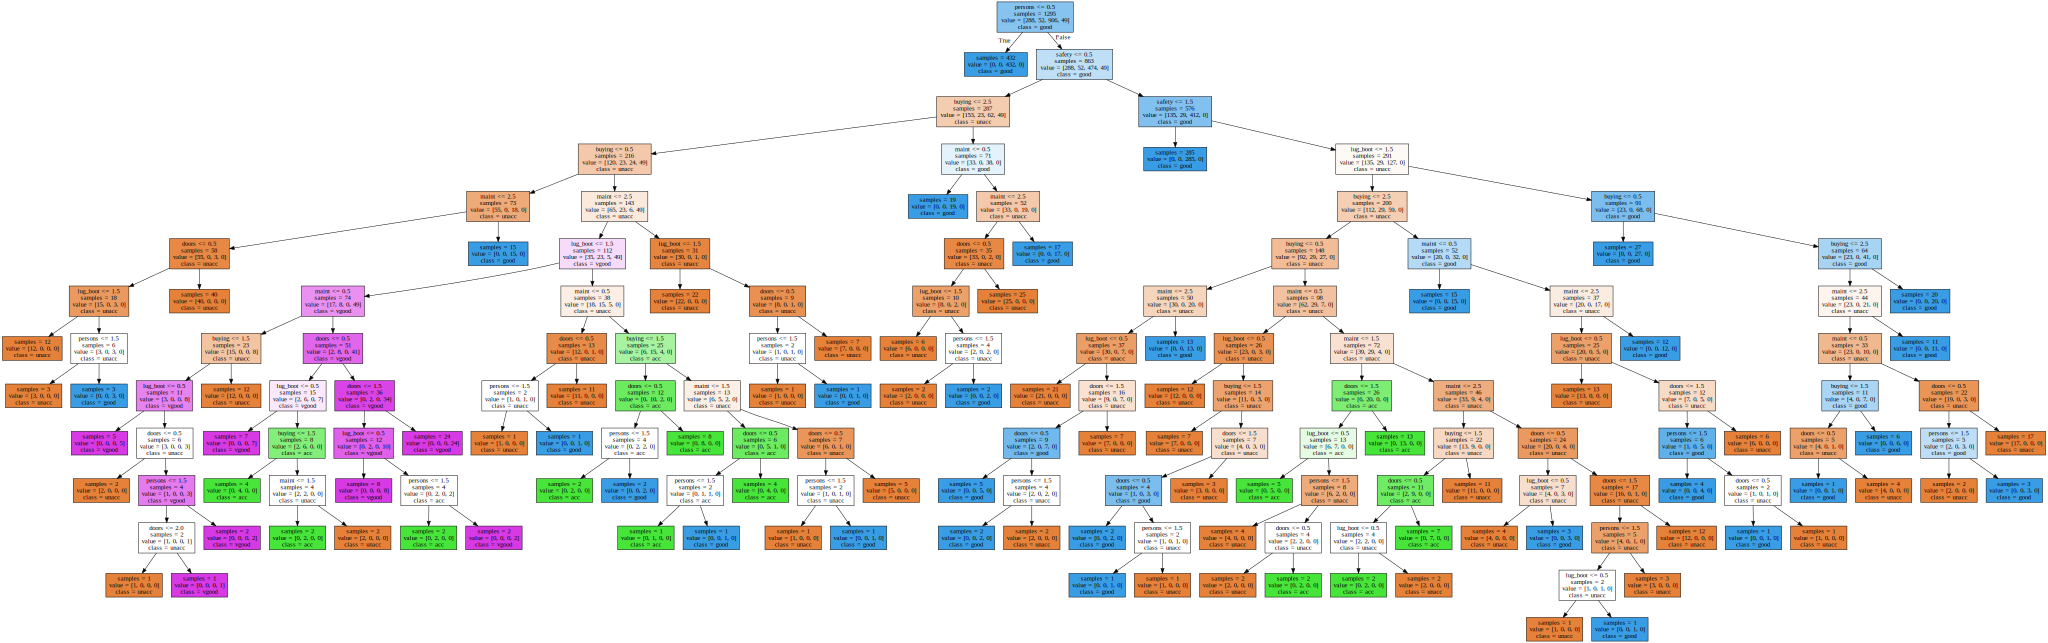

In [146]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
# http://www.graphviz.org/Download_macos.php
# !pip install graphviz

import graphviz
from IPython.display import set_matplotlib_formats, display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))